## Apply the Random Forests algorithm but this time only by upscaling the data.
Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

Plan:
1) Encode categoricals 
2) Build dataframe (numerical, categorical_encoded, target)
3) X/y split
4) Upsampling (only for train)
5) RandomForest
6) Model validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)


In [2]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

In [22]:
numerical.info() #no cateoricals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 315 entries, TCODE to CLUSTER2
dtypes: float64(9), int64(306)
memory usage: 229.3 MB


In [4]:
categorical.shape

(95412, 22)

In [5]:
targets.shape

(95412, 2)

In [201]:
targets #2 columns!
#print(targets.columns)
sum_D=sum(targets['TARGET_D'])
sum_D           

75668.7

In [7]:
categorical #looks like some of categoricals have numbers

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,96,1,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,96,1,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,95,1,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,86,1,40,5,90,11,96,8,97,1,86,12


In [26]:
numerical_from_cat=categorical.select_dtypes(include=[np.number])
numerical_from_cat #15 columns

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,36,3,2,89,1,37,12,92,8,94,2,95,12,89,11
1,14,3,1,94,1,52,2,93,10,95,12,95,12,93,10
2,43,3,2,90,1,0,2,91,11,92,7,95,12,90,1
3,44,3,2,87,1,28,1,87,11,94,11,95,12,87,2
4,16,3,2,86,1,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,27,3,2,96,1,0,2,96,2,96,2,96,2,96,2
95408,24,3,1,96,1,50,1,96,3,96,3,96,3,96,3
95409,30,3,3,95,1,38,1,96,3,95,1,96,10,94,10
95410,24,2,1,86,1,40,5,90,11,96,8,97,1,86,12


In [28]:
categorcial_for_enocder=categorical.select_dtypes([object])
categorcial_for_enocder.shape #7 columns/15+7=22/we didn't lose anything

(95412, 7)

In [31]:
from sklearn.preprocessing import OneHotEncoder 

#categorical['STATE'].unique().tolist()
categories = [categorcial_for_enocder[col].unique().tolist() for col in categorcial_for_enocder.columns]
one = OneHotEncoder(drop='first', categories = categories)
one.fit(categorcial_for_enocder)
categorical_encoded_np = one.transform(categorcial_for_enocder).toarray()
cat_encoded_df=pd.DataFrame(categorical_encoded_np, columns=one.get_feature_names_out())

In [32]:
#We don't have to normalize numerical, as decision trees ok with it
X_final = pd.concat([cat_encoded_df, numerical,numerical_from_cat], axis=1)
X_final #354 columns

,STATE_CA,STATE_NC,STATE_FL,STATE_other,STATE_IN,STATE_MI,STATE_MO,STATE_TX,STATE_WA,STATE_WI,STATE_GA,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_G,RFA_2A_F,RFA_2A_D,GEOCODE2_A,GEOCODE2_D,GEOCODE2_B,DOMAIN_A_S,DOMAIN_A_R,DOMAIN_A_U,DOMAIN_A_C,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,36,3,2,89,1,37,12,92,8,94,2,95,12,89,11
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,

In [47]:
y = targets

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=123)
print(f'X_train: {X_train.shape}')
print(f'X_test:  {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test:  {y_test.shape}')

X_train: (76329, 354)
X_test:  (19083, 354)
y_train: (76329, 2)
y_test:  (19083, 2)


In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE_B,y_train_SMOTE_B = sm.fit_resample(X_train,y_train['TARGET_B'])

In [39]:
print(X_train.shape)
print(X_train_SMOTE_B.shape)

(76329, 354)
(144904, 354)


In [40]:
y_train_SMOTE_B.value_counts() #Good. Our y is upscaled.

0    72452
1    72452
Name: TARGET_B, dtype: int64

The following code- I am trying to make different random trees with different parameters. Some cells took a very long time to run, so be careful to restart them.

In [91]:
from sklearn.ensemble import RandomForestClassifier # as body- categorical, so it's classifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

max_depth_choices = [8,10] # A list of the possible values of max_depth to try #None we won't use. but it can be
criterion_choices = ['gini', 'entropy'] # A list of the possible values optimization metrics
min_samples_split_choices = [2,5] # A list of the possible values of min_samples_split to try
min_samples_leaf_choices = [2,5] # A list of the possible values of min_samples_leaf to try    

In [92]:
# Create the  grid 
# this is a dictionary from hyperparameters to potential values
# the keys in this dictionary have to match the names of the hyperparameters in the documentation of the model
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [96]:
# estimator -> model to optimize 
model = RandomForestClassifier() 
# param_grid -> state the dictionary of parameters to optimize
# cv = 5 -> number of cross validation folds 

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, verbose=5) 
#model here can be any


In [97]:
grid_search.fit(X_train_SMOTE_B,y_train_SMOTE_B)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2;, score=0.838 total time=  51.6s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2;, score=0.949 total time=  49.4s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2;, score=0.952 total time=  51.2s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2;, score=0.954 total time=  49.9s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2;, score=0.949 total time=  48.2s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5;, score=0.841 total time=  48.3s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5;, score=0.952 total time=  48.3s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5;, score=0.953 total time=  50.9s
[CV 4/5] END criter

[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.851 total time= 1.0min
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.974 total time= 1.0min
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.972 total time= 1.0min
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.974 total time= 1.0min
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2;, score=0.970 total time= 1.0min
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5;, score=0.852 total time= 1.0min
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5;, score=0.972 total time= 1.0min
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5;, score=0.972 total time= 1.0min
[CV 4/5] END criterion=entropy, max_depth=10, mi

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [8, 10],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5]},
             verbose=5)

In [98]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

I dropped a max_depth to only 1 value - 10.

In [124]:
max_depth_choices = [10] # A list of the possible values of max_depth to try #None we won't use. but it can be
criterion_choices = ['gini', 'entropy'] # A list of the possible values optimization metrics
min_samples_split_choices = [2,5] # A list of the possible values of min_samples_split to try
min_samples_leaf_choices = [2,5]

In [125]:
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [126]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score

model = RandomForestClassifier() 

scorer = make_scorer(precision_score, pos_label=1, greater_is_better=True, average="binary")
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, scoring=scorer, verbose=5) 

In [127]:
grid_search.fit(X_train_SMOTE_B,y_train_SMOTE_B)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2;, score=0.961 total time= 1.1min
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2;, score=0.963 total time= 1.1min
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2;, score=0.965 total time= 1.0min
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2;, score=0.963 total time= 1.1min
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2;, score=0.958 total time= 1.0min
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.963 total time=  56.9s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.964 total time=  58.4s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.965 total time=  59.0s
[CV 4/5] END

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [10],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(precision_score, pos_label=1, average=binary),
             verbose=5)

I can't run the previous cell again, as it takes very long time, but best scores are already used for other cells. 
I will recalculate scores later again with fixed tree.

In [128]:
grid_search.best_params_
#I run random forest few times. It takes a long time... I will keep playing now with the set I have.

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

Below I am analizing the information that we get from random forest tree.

In [190]:
clf = RandomForestClassifier(max_depth=10,
                             criterion='gini',
                             min_samples_split=5,
                             min_samples_leaf =2,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train_SMOTE_B,y_train_SMOTE_B)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_SMOTE_B,y_train_SMOTE_B)))
print("The accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test['TARGET_B'])))

y_pred = clf.predict(X_test)
display(y_test['TARGET_B'].value_counts())
display(confusion_matrix(y_test['TARGET_B'], y_pred))


The accuracy for the Random Forest in the TRAIN set is 0.95
The accuracy for the Random Forest in the TEST  set is 0.91


0    18117
1      966
Name: TARGET_B, dtype: int64

array([[17369,   748],
       [  929,    37]], dtype=int64)

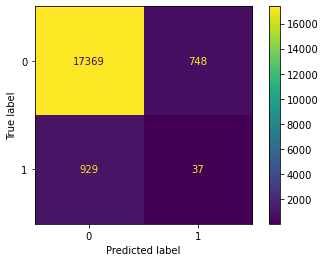

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test['TARGET_B'], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot()
plt.show
#A false positive is an error in binary classification in which a test result incorrectly indicates the 
#presence of a condition, while a false negative is the opposite error, where the test result incorrectly 
#indicates the absence of a condition when it is actually present. 

#So in our case - we thought people donate, they didn't donate - 929
#We thought people won't donate, but they actually donated - 748.
#We need to minimize these risks, we need to know customers better, so studing features is a good idea. 

In [192]:
#clf.feature_importances_ 

In [194]:
#list(zip(X_train_SMOTE_B.columns,clf.feature_importances_))

In [195]:
importances = list(zip(regr.feature_importances_,X_train_SMOTE_B.columns))
importances.sort(reverse=True)
importances
# We KNOW which columns has the biggest effect. That can be the big help for business development.

[(0.09226081718392631, 'RFA_2A_F'),
 (0.06673329630084657, 'GENDER_M'),
 (0.050314516989415574, 'RFA_2A_G'),
 (0.036466327256582595, 'HOMEOWNR_U'),
 (0.03365064487334227, 'HPHONE_D'),
 (0.031348485975326586, 'RFA_2A_D'),
 (0.031163868727982533, 'LASTGIFT'),
 (0.028054571496447616, 'LASTDATE_MM'),
 (0.025683702947037607, 'DOMAIN_A_S'),
 (0.02457552695501057, 'WEALTH1'),
 (0.02402839123784052, 'MAXRDATE_MM'),
 (0.02354282700914026, 'MAXRAMNT'),
 (0.023316251593010432, 'DOMAIN_A_C'),
 (0.02291446915271702, 'MAXRDATE_YR'),
 (0.02229466898498311, 'ODATEW_YR'),
 (0.021393121367500042, 'FIRSTDATE_YR'),
 (0.020456628352525534, 'DOB_YR'),
 (0.020192620596807154, 'LFC9'),
 (0.0189773774448734, 'WEALTH2'),
 (0.01850790424662613, 'MINRAMNT'),
 (0.01601010049603823, 'CARDPM12'),
 (0.013969978726982989, 'FIRSTDATE_MM'),
 (0.012503244763098664, 'LFC8'),
 (0.012378120173621585, 'DOMAIN_A_R'),
 (0.010648543561117281, 'HC19'),
 (0.009942490737762162, 'POP90C3'),
 (0.00978566117378664, 'DATASRCE'),
 (0.0

Below I am analyzing the false negative and false positive.

In [157]:
falsen_neg_list = X_test[(y_test['TARGET_B'] == 0) & (y_pred == 1)] #False Negatives

#falsen_neg_list has 748, what is refering to the number in confusion matrix above
#Because we have done smote only to a train set, this calculation is possible.

,STATE_CA,STATE_NC,STATE_FL,STATE_other,STATE_IN,STATE_MI,STATE_MO,STATE_TX,STATE_WA,STATE_WI,STATE_GA,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_G,RFA_2A_F,RFA_2A_D,GEOCODE2_A,GEOCODE2_D,GEOCODE2_B,DOMAIN_A_S,DOMAIN_A_R,DOMAIN_A_U,DOMAIN_A_C,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
77799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,78.0,1,9,0,0,19,43,0,4,0,1,5,22712,5940,7985,6,63,31,49,51,95,0,0,1,6,0,0,0,0,0,0,0,5,0,0,1,32,40,43,35,44,48,26,42,38,20,13,23,22,15,10,9,8,18,17,32,20,14,22,9,20,20,32,47,30,12,4,61,9,7,23,192,274,73,70,8,26,18,14,3,2,1,1076,1298,4,4,68,32,97,3,17,39,74,64,33,84,16,6,2,4,13,17,5,21,58,16,0,0,0,13,26,55,85,98,3,3,55,59,58,15,4,15,11,0,8,9,14,0,25,64,83,91,1600.0,51.0,602.0,379,430,434,488,16399,15,15,15,22,20,6,3,1,2,8,13,15,25,25,8,3,1,2,24,4,50,5,51,49,8,78,11,3,1,2,0,0,3,4,1,27,18,27,13,48,72,82,62,79,61,68,55,76,91,4,12,12,4,11,16,0,1,10,3,13,9,3,4,4,0,9,24,3,2,5,15,7,3,2,2,8,6,7,3,7,1,1,7,76,7,0,120,9,10,33,22,6,12,7,4,21,3,17,6,0,0,0,15,30,1,32,17,28,9,0,3,0,19,0,0,4,2,1,3,0,0,1,1,0,6,72,91,5,1,3,95,65,21,5,26,4,14,20,43,57,43,1,0,81,5,11,2,0,1,71,29,67,99,98,10,3,6,4,23,55,6,13,81.0,7,4,3.0,16.0,16.0,20,11.571429,89247,0,2,16,38,2,2,88,1,20,1,88,2,95,11,96,1,88,2
62633,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,42.0,6,7,1,8,43,65,11,2,5,19,7,2301,632,748,99,0,0,48,52,87,8,0,5,2,0,0,0,0,0,4,0,0,0,0,1,28,38,41,30,40,44,33,36,40,24,17,24,24,18,9,6,2,14,14,33,21,18,12,3,10,13,28,59,36,16,6,62,12,4,22,239,307,82,81,0,12,12,10,0,0,0,464,488,3,3,71,29,94,6,2,54,84,66,40,93,7,14,3,11,8,11,3,23,56,8,2,5,0,0,0,1,4,37,0,2,50,53,55,17,5,11,1,6,16,2,10,1,1,10,54,84,920.0,363.0,746.0,283,298,302,319,10141,17,26,21,25,11,0,0,0,0,14,25,24,24,13,0,0,0,0,9,1,24,5,44,56,20,83,15,0,0,0,0,0,1,1,3,73,19,24,6,64,78,91,64,90,62,74,57,99,99,0,11,10,7,18,15,0,0,9,0,16,5,5,7,0,0,6,14,9,5,5,24,5,3,1,3,6,6,4,10,2,5,19,1,68,4,1,120,6,13,38,21,15,5,2,4,29,1,27,5,5,8,2,23,43,4,65,18,11,14,0,7,6,6,0,0,6,1,0,0,0,0,0,0,0,5,41,94,0,4,2,99,70,23,7,18,0,0,7,68,95,5,0,0,72,7,21,0,0,0,90,10,90,99,94,5,3,4,2,22,52,6

In [160]:
falsen_neg_list.index  

Int64Index([77799, 62633, 17168, 86943, 74221, 82664, 67122, 32865, 85065,
            83895,
            ...
            74245, 24184, 84725, 77729, 94091, 54152, 61581, 32203, 24913,
            74475],
           dtype='int64', length=748)

In [170]:
count=0
for x in falsen_neg_list.index:
    count+=y['TARGET_D'][x]
print(count)
#FAlse negative The target D is equal to 0, because we thought people will send money, but they didn't.
#So this is logical. But we spent money on postage service and a card. So we want to minimize this mistake.

0.0


In [158]:
falsen_pos_list = X_test[(y_test['TARGET_B'] == 1) & (y_pred == 0)] #False positive
falsen_pos_list
#falsen_neg_list has 929, what is refering to the number in confusion matrix above

,STATE_CA,STATE_NC,STATE_FL,STATE_other,STATE_IN,STATE_MI,STATE_MO,STATE_TX,STATE_WA,STATE_WI,STATE_GA,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_G,RFA_2A_F,RFA_2A_D,GEOCODE2_A,GEOCODE2_D,GEOCODE2_B,DOMAIN_A_S,DOMAIN_A_R,DOMAIN_A_U,DOMAIN_A_C,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
44687,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2,53.000000,7,9,13,0,27,8,42,4,3,0,9,761,187,260,99,0,0,48,52,94,1,1,3,8,0,1,1,0,0,0,0,6,0,0,2,39,46,48,39,48,51,23,36,43,21,10,12,24,20,16,10,8,8,21,36,19,16,32,9,27,21,30,49,31,17,9,54,17,5,24,196,288,90,80,4,8,4,1,1,1,0,5828,5591,11,9,78,22,89,11,34,32,72,59,27,80,20,6,3,3,13,22,7,18,56,20,0,0,0,98,99,99,99,99,94,4,70,73,66,15,4,7,1,0,17,3,0,0,85,89,89,89,7480.0,17.0,855.0,856,1043,854,976,40064,8,6,14,8,2,23,7,9,23,5,2,7,15,0,16,18,5,31,41,2,80,7,27,73,6,70,7,0,0,0,0,0,8,14,0,2,10,14,0,45,57,72,44,70,42,69,68,99,99,0,36,12,3,11,7,3,2,5,2,11,0,5,1,1,0,8,5,4,0,3,10,5,1,5,5,11,8,33,0,4,3,0,36,51,7,0,157,0,0,16,30,6,20,28,6,18,0,13,11,0,0,0,16,27,8,8,43,42,12,1,16,0,5,1,1,3,0,0,1,0,0,3,3,0,5,40,93,4,0,3,98,72,40,13,44,0,0,0,8,33,67,3,0,91,0,6,0,0,3,98,2,75,99,99,20,4,11,10,25,56,4,10,64.0,6,5,5.0,16.0,16.0,22,10.666667,159319,1,1,14,13,3,1,86,1,45,6,88,5,95,9,95,9,88,5
2416,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,61.611649,5,9,0,0,39,9,57,4,2,2,9,2392,750,1123,99,0,0,46,54,99,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,51,59,61,49,56,58,15,43,33,23,6,15,13,10,14,19,23,19,19,27,19,16,54,23,51,29,45,26,11,3,1,64,9,14,13,147,213,69,67,5,14,10,10,0,0,0,709,731,5,7,75,25,87,13,65,19,67,58,15,81,19,4,1,3,11,27,5,12,44,43,0,0,0,0,1,6,39,94,0,8,28,47,47,12,4,5,10,13,11,4,7,0,50,78,94,96,7510.0,645.0,539.0,256,271,291,327,13576,18,30,28,12,11,2,0,0,0,9,29,31,12,15,2,0,0,0,53,4,53,6,54,46,28,85,13,0,0,0,0,0,2,0,0,8,18,24,7,53,49,54,45,53,44,85,81,99,0,0,10,6,1,21,14,0,2,23,0,15,3,3,2,1,0,6,3,3,3,2,28,7,8,6,3,10,4,14,2,4,2,2,14,67,12,0,120,8,17,37,22,4,7,6,2,12,1,10,2,0,0,1,19,39,2,9,17,57,13,1,7,1,7,0,0,5,7,1,1,0,0,1,2,0,3,8,94,0,1,5,94,40,6,6,16,0,7,25,80,95,5,0,0,3,5,85,4,2,0,34,66,24,99,99,6,2,6,12,25,5

In [171]:
falsen_pos_list.index  

Int64Index([44687,  2416,  9671,  7560, 48611, 54575, 86129, 15567, 67105,
            94474,
            ...
             7502, 56968,  4685, 94788, 68666, 56644, 21876, 27475,  8451,
            39766],
           dtype='int64', length=929)

In [172]:
count=0
for x in falsen_pos_list.index:
    count+=y['TARGET_D'][x]
print(count) 
#Wow!!! False positive . People sent us 14918 dollars, it's quiet a lot.
#The total amount that was donated was 75668.7. 

14918.87


In [203]:
(count/sum_D)*100 #we didn't predict almost 20 percent of donation. 

19.716038467688758

Conclusion: false negative is more negative to company, we were spending money hoping for donation, but it didn't happen.
False positive is better, people donated, but we though they won't. In anyway we need to know our customer more. Maybe we should better analyze people who we thought will donate and they didn't and as well we need to know better people who donated, and we thought they didn't. We can run similar prediction models on those 2 groups separately, make graphs, using function "importance of the features", getting a closer look. Maybe we can see more insight. Maybe these people are so different, so we will understand, what should we with next compain.  

## Different errors for confusion matrix:
# F1

In [176]:
#Let's fix those parameters
max_depth_choices = [10] # A list of the possible values of max_depth to try #None we won't use. but it can be
criterion_choices = ['gini'] # A list of the possible values optimization metrics
min_samples_split_choices = [5] # A list of the possible values of min_samples_split to try
min_samples_leaf_choices = [2]

In [177]:
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [178]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

model = RandomForestClassifier() 

scorer = make_scorer(f1_score)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, scoring=scorer, verbose=5) #scoring=scorer

#f1_score is the best for cv3-5 - I don't know what to do with this knowledge

In [179]:
grid_search.fit(X_train_SMOTE_B,y_train_SMOTE_B)
#f1score the highest, when 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.833 total time= 1.0min
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.975 total time=  56.2s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.976 total time=  56.2s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.974 total time=  55.6s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.972 total time=  54.8s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'min_samples_leaf': [2], 'min_samples_split': [5]},
             scoring=make_scorer(f1_score), verbose=5)

In [180]:
grid_search.best_score_ #this is the best score forF1, the mean

0.9460944480507013

## Precision score

In [181]:
scorer = make_scorer(precision_score)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, scoring=scorer, verbose=5) #scoring=scorer

In [182]:
grid_search.fit(X_train_SMOTE_B,y_train_SMOTE_B)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.965 total time= 1.0min
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.967 total time=  56.5s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.960 total time=  58.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.966 total time=  57.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.961 total time=  56.9s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'min_samples_leaf': [2], 'min_samples_split': [5]},
             scoring=make_scorer(precision_score), verbose=5)

In [183]:
grid_search.best_score_# 0.9635730109009794- precision best

0.9635730109009794

## Accuracy score

In [184]:
scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, scoring=scorer, verbose=5) #scoring=scorer

In [185]:
grid_search.fit(X_train_SMOTE_B,y_train_SMOTE_B)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.855 total time=  58.3s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.974 total time=  56.6s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.974 total time=  58.9s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.976 total time=  58.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.972 total time=  56.6s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'min_samples_leaf': [2], 'min_samples_split': [5]},
             scoring=make_scorer(accuracy_score), verbose=5)

In [186]:
grid_search.best_score_ #0.9500774468048829 best score for accuracy

0.9500774468048829

## recall_score

In [187]:
scorer = make_scorer(recall_score)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, scoring=scorer, verbose=5) #scoring=scorer

In [188]:
grid_search.fit(X_train_SMOTE_B,y_train_SMOTE_B)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.737 total time= 1.0min
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.985 total time=  56.8s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.987 total time=  57.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.986 total time=  57.6s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.985 total time=  56.3s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'min_samples_leaf': [2], 'min_samples_split': [5]},
             scoring=make_scorer(recall_score), verbose=5)

In [189]:
grid_search.best_score_ # best score for recall_score -0.9358

0.9358319804315369

## The highest score is with precision.